In [1]:
import uproot

In [35]:
tree = uproot.open("/afs/cern.ch/work/m/mproffit/public/calratio/signal_HSS_LLP_mH1000_mS50_lt9m_ntuples2016dataAnalysis_paperVersion.root")["recoTree"]

In [3]:
tree.keys()

[b'eventNumber',
 b'eventCount',
 b'runNumber',
 b'lumiBlock',
 b'backgroundFlags',
 b'eventWeight',
 b'pdfEventWeights',
 b'pileupEventWeight',
 b'xSecEventWeight',
 b'actualIntPerCrossing',
 b'averageIntPerCrossing',
 b'event_NCleanJets',
 b'event_NJets',
 b'event_NCleanJets',
 b'event_HT',
 b'event_MHToHT',
 b'event_HTMiss',
 b'event_Meff',
 b'event_sumMinDR',
 b'METCST_met',
 b'METTST_met',
 b'event_tauRoI_maxET',
 b'event_passL1TAU60',
 b'event_passL1LLPNOMATCH',
 b'event_passEmulationL1LLPNOMATCH',
 b'event_passL1LLPRO',
 b'event_passCalRatio_cleanLLP_TAU60',
 b'event_passCalRatio_cleanLLP_TAU60_noiso',
 b'event_passCalRatio_cleanLLP_LLPNOMATCH',
 b'event_passCalRatio_cleanLLP_LLPNOMATCH_noiso',
 b'event_passEmulationCalRatio_cleanLLP_LLPNOMATCH_noiso',
 b'event_passJ320_bperf_split',
 b'dPhiLeadBDTsignalWeight_cleanJet',
 b'dRLeadBDTsignalWeight_cleanJet',
 b'dPhiLeadBDTmultijetsWeight_cleanJet',
 b'dRLeadBDTmultijetsWeight_cleanJet',
 b'dPhiLeadBDTbibWeight_cleanJet',
 b'dRLead

In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of events')

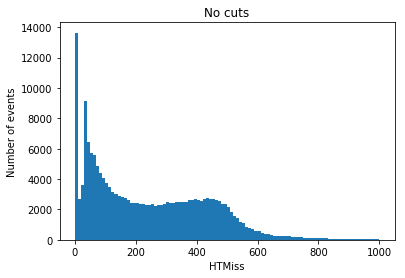

In [54]:
plt.hist(tree.array("event_HTMiss"), 100, (0,1000))
plt.title("No cuts")
plt.xlabel("HTMiss")
plt.ylabel("Number of events")

In [6]:
import numpy as np

Number of events after cut: 76482


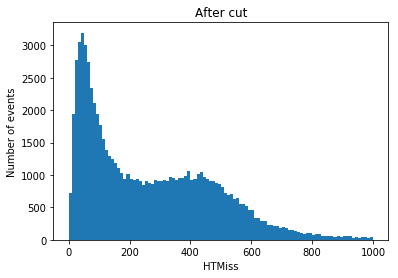

In [56]:
HTMiss_passing_cut = []
HTMiss_array, CalibJet_pT_array = tree.arrays(["event_HTMiss", "CalibJet_pT"], outputtype=tuple)
for HTMiss, CalibJet_pT in zip(HTMiss_array, CalibJet_pT_array):
    if np.count_nonzero(CalibJet_pT > 100) >= 2:
        HTMiss_passing_cut.append(HTMiss)
plt.hist(HTMiss_passing_cut, 100, (0,1000))
plt.title("After cut")
plt.xlabel("HTMiss")
plt.ylabel("Number of events")
print("Number of events after cut:", len(HTMiss_passing_cut))